# Correlation between BTC and S3 (Sentiment) 

### Import packages, and data

In [1]:
if(!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org") # run this the first time (only need to once)
library(tidyverse) # includes ggplot2 and many more useful libraries

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  2.0.1     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.3.1     ✔ forcats 0.3.0
Warning message:
“package ‘tibble’ was built under R version 3.5.2”── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [5]:
df <- read.csv("btc_S3.csv")

In [6]:
head(df)

X,date,timestamp,volume,price,log_p,log_p_lag,percent_change,S3_mean,positive,negative
1,2018-01-01,1514869199,0.0001200,13164.83,9.485304,NA,NA,0.08666667,0.38,-0.12
2,2018-01-02,1514955596,0.0097000,15090.01,9.621788,9.485304,0.136484056,0.10000000,0.40,-0.10
3,2018-01-03,1515041999,0.1000000,14986.76,9.614922,9.621788,-0.006865791,0.09000000,0.40,-0.13
4,2018-01-04,1515128398,0.0310000,14938.79,9.611716,9.614922,-0.003205959,0.11000000,0.45,-0.12
5,2018-01-05,1515214798,0.0065683,16550.02,9.714143,9.611716,0.102426124,0.04333333,0.32,-0.19
6,2018-01-06,1515301186,0.9117000,16635.31,9.719283,9.714143,0.005140234,0.05666667,0.25,-0.08


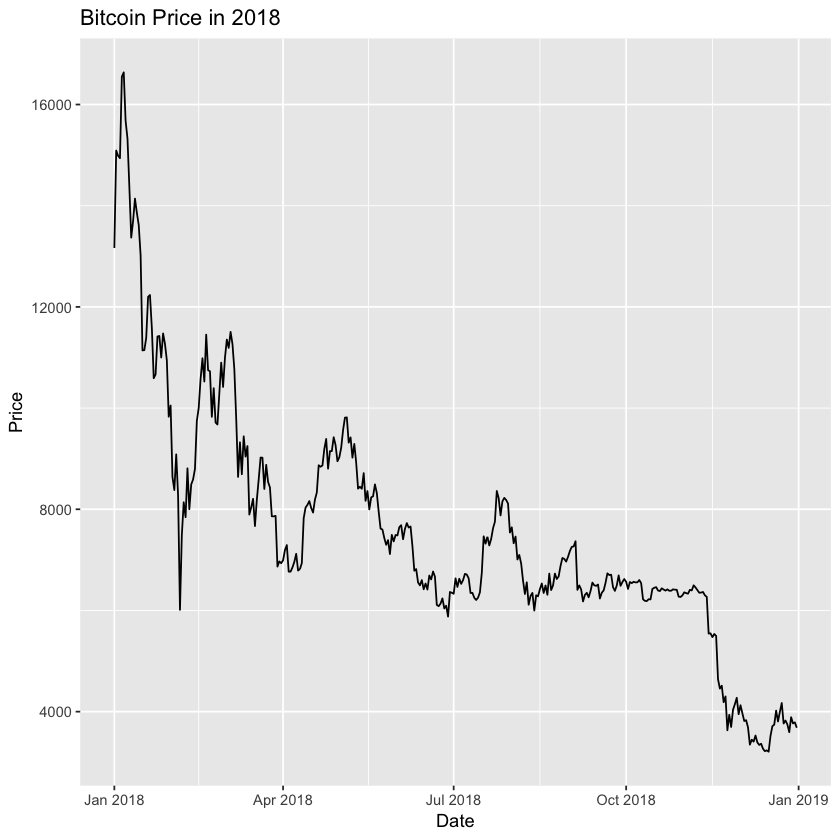

In [17]:
df$date2 <- as.Date(df$date)
ggplot(df, aes(x = date2, y = price)) +
    geom_line() + 
    labs(x = "Date", y = "Price", title ="Bitcoin Price in 2018") 
    

### Correlations

In [14]:
correlation_price <- cor(df[2:365,"price"], df[2:365, "S3_mean"])
correlation_percent <- cor(df[2:365,"percent_change"], df[2:365, "S3_mean"])


correlation_positive <- cor(df[2:365,"price"], df[2:365, "positive"])
correlation_positive_percent <- cor(df[2:365,"percent_change"], df[2:365, "positive"])

correlation_negative <- cor(df[2:365,"price"], df[2:365, "negative"])
correlation_negative_percent <- cor(df[2:365,"percent_change"], df[2:365, "negative"])

cat("Correlation of price with Sentiment measure:", correlation_price, "\n")
cat("Correlation of percent change with Sentiment measure:", correlation_percent, "\n")
cat("Correlation of price with (+) Sentiment measure:", correlation_positive, "\n")
cat("Correlation of percent change with Sentiment measure:", correlation_positive_percent, "\n")
cat("Correlation of price with (-) Sentiment measure:", correlation_negative, "\n")
cat("Correlation of percent change with Sentiment measure:", correlation_negative_percent, "\n")

Correlation of price with Sentiment measure: 0.1364372 
Correlation of percent change with Sentiment measure: -0.0641824 
Correlation of price with (+) Sentiment measure: 0.04557587 
Correlation of percent change with Sentiment measure: -0.06743098 
Correlation of price with (-) Sentiment measure: 0.1913126 
Correlation of percent change with Sentiment measure: -0.02611477 


Warning message:
“Removed 1 rows containing missing values (geom_path).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

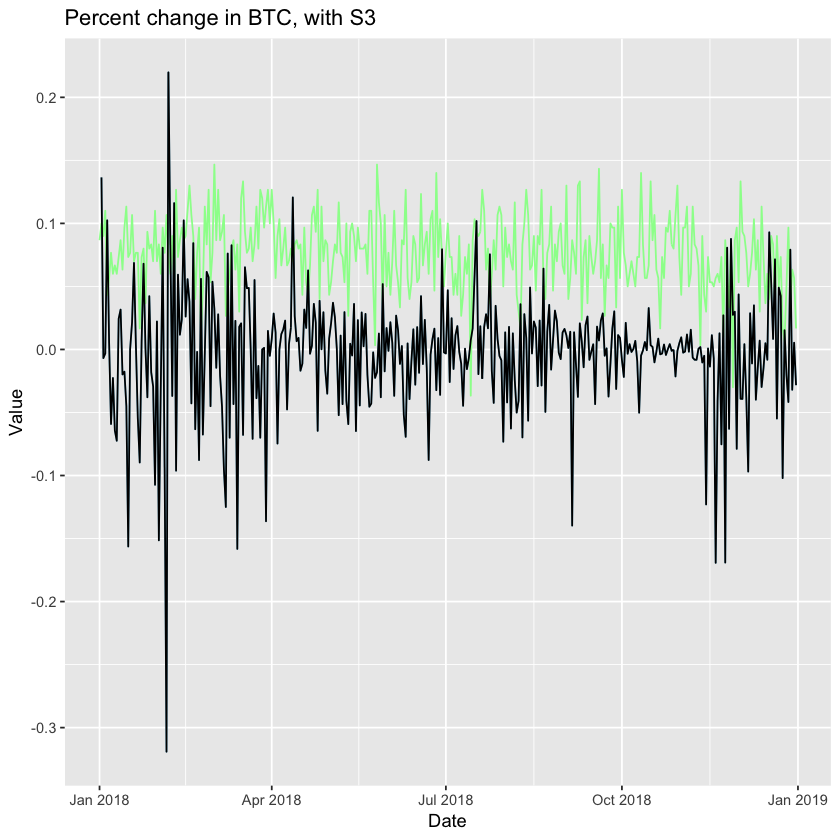

In [22]:
ggplot(df, aes(x = date2, y = percent_change), colour = "skyblue") +
    geom_line(aes(y = percent_change), colour = "skyblue") + 
    geom_line(aes(y = S3_mean), colour = "palegreen1") +
    geom_line() + 
    labs(x = "Date", y = "Value", title ="Percent change in BTC, with S3") 